In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [536]:
df = pd.read_csv("startup_funding.csv")
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [537]:
df["Amount in USD"].str.isalnum()

0       False
1       False
2       False
3       False
4       False
        ...  
3039    False
3040    False
3041    False
3042      NaN
3043    False
Name: Amount in USD, Length: 3044, dtype: object

In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [539]:
## Remarks is redundant
df.drop("Remarks",inplace=True,axis=1)

In [540]:
df.info() ## remarks is deleted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
dtypes: int64(1), object(8)
memory usage: 214.2+ KB


In [541]:
df[["Investors Name"]]

,Investors Name
0,Tiger Global Management
1,Susquehanna Growth Equity
2,Sequoia Capital India
3,Vinod Khatumal
4,Sprout Venture Partners
...,...
3039,Asia Pacific Internet Group
3040,KARSEMVEN Fund
3041,"Exfinity Fund, GrowX Ventures."
3042,MakeMyTrip


In [542]:
# setting serial number as index
df.set_index("Sr No",inplace=True)

In [543]:
df.head()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [544]:
df.rename(columns={
    "Date dd/mm/yyyy":"Date",
    "Startup Name":"Startup",
    "Industry Vertical":"Vertical",
    "SubVertical":"SubVertical",
    "City  Location":"City",
    "Investors Name":"Investors",
    "InvestmentnType":"Round",
    "Amount in USD":"Amount"
},inplace=True)

In [545]:
df.head()

,Date,Startup,Vertical,SubVertical,City,Investors,Round,Amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [546]:
# Amount to crore rupees
df["Amount"].dtype

dtype('O')

In [547]:
df.isnull().sum()

Date             0
Startup          0
Vertical       171
SubVertical    936
City           180
Investors       24
Round            4
Amount         960
dtype: int64

#### We have null vlaues in amount we are going to fill it with 0 which for our convinience is basically undisclosed amount

In [548]:
df["Amount"]=df["Amount"].fillna("0")

In [549]:
df["Amount"].str.isalnum()

Sr No
1       False
2       False
3       False
4       False
5       False
        ...  
3040    False
3041    False
3042    False
3043     True
3044    False
Name: Amount, Length: 3044, dtype: bool

In [550]:
df["Amount"]=df["Amount"].str.replace(",","")

In [551]:
df["Amount"]=df["Amount"].str.replace("undisclosed","0")

In [552]:
df["Amount"]=df["Amount"].str.replace("unknown","0")

In [553]:
df["Amount"]=df["Amount"].str.replace("Undisclosed","0")

In [554]:
df["Amount"].str.isalnum()

Sr No
1       True
2       True
3       True
4       True
5       True
        ... 
3040    True
3041    True
3042    True
3043    True
3044    True
Name: Amount, Length: 3044, dtype: bool

In [555]:
df["Amount"]=df["Amount"].fillna("0")

In [556]:
df["Amount"]

Sr No
1       200000000
2         8048394
3        18358860
4         3000000
5         1800000
          ...    
3040      4500000
3041       825000
3042      1500000
3043            0
3044       140000
Name: Amount, Length: 3044, dtype: object

In [557]:
df[df["Amount"].str.isalpha()]["Amount"]

Series([], Name: Amount, dtype: object)

In [558]:
df["Amount"] = df["Amount"].str.replace("nan","0")

In [559]:
df.iloc[[3042]]

,Date,Startup,Vertical,SubVertical,City,Investors,Round,Amount
Sr No,,,,,,,,
3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,0


In [560]:
df["Amount"] = df["Amount"].str.replace("NaN","0")

In [561]:
df= df[df["Amount"].str.isdigit()]

In [562]:
df["Amount"] = df["Amount"].astype("float")

C:\Users\hp\AppData\Local\Temp\ipykernel_14972\3082992061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Amount"] = df["Amount"].astype("float")


In [563]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3029 non-null   object 
 1   Startup      3029 non-null   object 
 2   Vertical     2858 non-null   object 
 3   SubVertical  2104 non-null   object 
 4   City         2849 non-null   object 
 5   Investors    3005 non-null   object 
 6   Round        3027 non-null   object 
 7   Amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


#### Amount to inr

In [564]:
def to_inr(dollar):
    inr = dollar * 83
    return inr/1000000

In [565]:
df["Amount"]=df["Amount"].apply(to_inr)

C:\Users\hp\AppData\Local\Temp\ipykernel_14972\780316230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Amount"]=df["Amount"].apply(to_inr)


In [570]:
df["Date"] = df["Date"].str.replace("05/072018","05/07/2018")


C:\Users\hp\AppData\Local\Temp\ipykernel_14972\3347140606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].str.replace("05/072018","05/07/2018")


In [572]:
df["Date"] = df["Date"].str.replace("01/07/015","01/07/2015")

C:\Users\hp\AppData\Local\Temp\ipykernel_14972\1878008246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].str.replace("01/07/015","01/07/2015")


In [583]:

df["Date"] = df["Date"].str.replace(".","/")

C:\Users\hp\AppData\Local\Temp\ipykernel_14972\545409235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].str.replace(".","/")


In [584]:

df["Date"] = df["Date"].str.replace("//","/")

C:\Users\hp\AppData\Local\Temp\ipykernel_14972\902651141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].str.replace("//","/")


In [587]:
df["Date"]=pd.to_datetime(df["Date"],format='%d/%m/%Y')

C:\Users\hp\AppData\Local\Temp\ipykernel_14972\853070118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"]=pd.to_datetime(df["Date"],format='%d/%m/%Y')


In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3029 non-null   datetime64[ns]
 1   Startup      3029 non-null   object        
 2   Vertical     2858 non-null   object        
 3   SubVertical  2104 non-null   object        
 4   City         2849 non-null   object        
 5   Investors    3005 non-null   object        
 6   Round        3027 non-null   object        
 7   Amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [589]:
df.head()

,Date,Startup,Vertical,SubVertical,City,Investors,Round,Amount
Sr No,,,,,,,,
1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,16600.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,668.016702
3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,1523.785380
4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,249.000000
5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,149.400000


In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3029 non-null   datetime64[ns]
 1   Startup      3029 non-null   object        
 2   Vertical     2858 non-null   object        
 3   SubVertical  2104 non-null   object        
 4   City         2849 non-null   object        
 5   Investors    3005 non-null   object        
 6   Round        3027 non-null   object        
 7   Amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [592]:
df= df.dropna(subset=["Vertical","City","Round","Investors","Amount"])

In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2823 non-null   datetime64[ns]
 1   Startup      2823 non-null   object        
 2   Vertical     2823 non-null   object        
 3   SubVertical  2078 non-null   object        
 4   City         2823 non-null   object        
 5   Investors    2823 non-null   object        
 6   Round        2823 non-null   object        
 7   Amount       2823 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.5+ KB


In [594]:
df.to_csv("startup_funding_cleaned.csv",index=False)

In [598]:
df[df["Investors"].str.contains("Tiger Global Management")].head()[["Date","Startup","Vertical","City","Round","Amount"]]

,Date,Startup,Vertical,City,Round,Amount
Sr No,,,,,,
1,2020-01-09,BYJU’S,E-Tech,Bengaluru,Private Equity Round,16600.0
56,2019-08-22,INDwealth,FinTech,Gurgaon,Venture Round,1245.0
69,2019-07-11,Moglix,E-Commerce,Singapore,Series D,4980.0
86,2019-06-10,OkCredit,FinTech,Haryana,Series A,1286.5
94,2019-05-02,Zenoti,Saas,Hyderabad,Series C,4150.0


In [603]:
df[df["Investors"].str.contains("Tiger Global Management")].groupby("Startup")["Amount"].sum().sort_values(ascending=False)

Startup
BYJU’S                   16600.0
Shopclues                 8300.0
Saavn                     8300.0
Delhivery                 7055.0
Moglix                    4980.0
Zenoti                    4150.0
Zovi.com / Little App     4150.0
Grey Orange               2490.0
Zo Rooms                  2490.0
CleverTap                 2158.0
BlackBuck                 2075.0
Chargebee                 1494.0
OkCredit                  1286.5
INDwealth                 1245.0
Lybrate                    846.6
Razorpay                   747.0
Cube26                     639.1
LocalOye                   415.0
Vedantu                    415.0
Chaayos                    249.0
Name: Amount, dtype: float64

In [605]:
df["Year"]=df["Date"].dt.year

<Axes: xlabel='Year'>

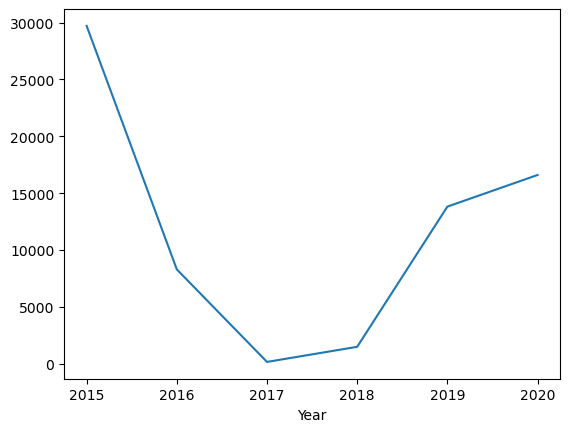

In [607]:
df[df["Investors"].str.contains("Tiger Global Management")].groupby("Year")["Amount"].sum().plot()

In [608]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2823 entries, 1 to 2873
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2823 non-null   datetime64[ns]
 1   Startup      2823 non-null   object        
 2   Vertical     2823 non-null   object        
 3   SubVertical  2078 non-null   object        
 4   City         2823 non-null   object        
 5   Investors    2823 non-null   object        
 6   Round        2823 non-null   object        
 7   Amount       2823 non-null   float64       
 8   Year         2823 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(6)
memory usage: 209.5+ KB
